In [28]:
# import basic libraries
import yt
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070.0.h5')

yt : [INFO     ] 2017-06-23 15:56:06,107 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-06-23 15:56:06,109 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-23 15:56:06,112 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-23 15:56:06,116 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-06-23 15:56:06,119 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-23 15:56:06,121 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-06-23 15:56:06,123 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-06-23 15:56:06,125 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-06-23 15:56:06,126 Parameters: hubble_constant           = 0.6933


In [10]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [11]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-06-23 15:38:48,014 Allocating for 9.178e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-23 15:38:48,033 Identified 3.025e+03 octs


In [38]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
xmin = 2.22535525e+25*0.39319589 * u.cm
ymin = 2.22535525e+25*0.42984636 * u.cm
zmin = 2.22535525e+25*0.41706725 * u.cm

xmax = 2.22535525e+25*0.56298484 * u.cm
ymax = 2.22535525e+25*0.55089246 * u.cm
zmax = 2.22535525e+25*0.56698254 * u.cm

In [56]:
# find masses of halos
masslist = []

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist.append(mass.value)


In [57]:
masslist = np.array(masslist)

In [78]:
bins = np.linspace(1e5, 1e9, 300)

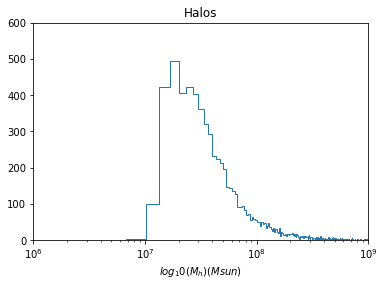

In [82]:
plt.hist(masslist, bins, histtype='step', fill = False)
plt.title("Halos")
plt.xlabel("$log_10(M_h) (Msun)$")
plt.xscale('log')
plt.axis([1e6, 1e9, 0, 600])
plt.show()

In [80]:
np.linspace(1e5, 1e9, 300)

array([  1.00000000e+05,   3.44414716e+06,   6.78829431e+06,
         1.01324415e+07,   1.34765886e+07,   1.68207358e+07,
         2.01648829e+07,   2.35090301e+07,   2.68531773e+07,
         3.01973244e+07,   3.35414716e+07,   3.68856187e+07,
         4.02297659e+07,   4.35739130e+07,   4.69180602e+07,
         5.02622074e+07,   5.36063545e+07,   5.69505017e+07,
         6.02946488e+07,   6.36387960e+07,   6.69829431e+07,
         7.03270903e+07,   7.36712375e+07,   7.70153846e+07,
         8.03595318e+07,   8.37036789e+07,   8.70478261e+07,
         9.03919732e+07,   9.37361204e+07,   9.70802676e+07,
         1.00424415e+08,   1.03768562e+08,   1.07112709e+08,
         1.10456856e+08,   1.13801003e+08,   1.17145151e+08,
         1.20489298e+08,   1.23833445e+08,   1.27177592e+08,
         1.30521739e+08,   1.33865886e+08,   1.37210033e+08,
         1.40554181e+08,   1.43898328e+08,   1.47242475e+08,
         1.50586622e+08,   1.53930769e+08,   1.57274916e+08,
         1.60619064e+08,